In [2]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
df = pd.read_csv("C:/Users/Shriya/Desktop/Loan prediction/train.csv") #Reading the dataset in a dataframe using Pandas
df.head(10)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
 df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<IPython.core.display.Javascript object>


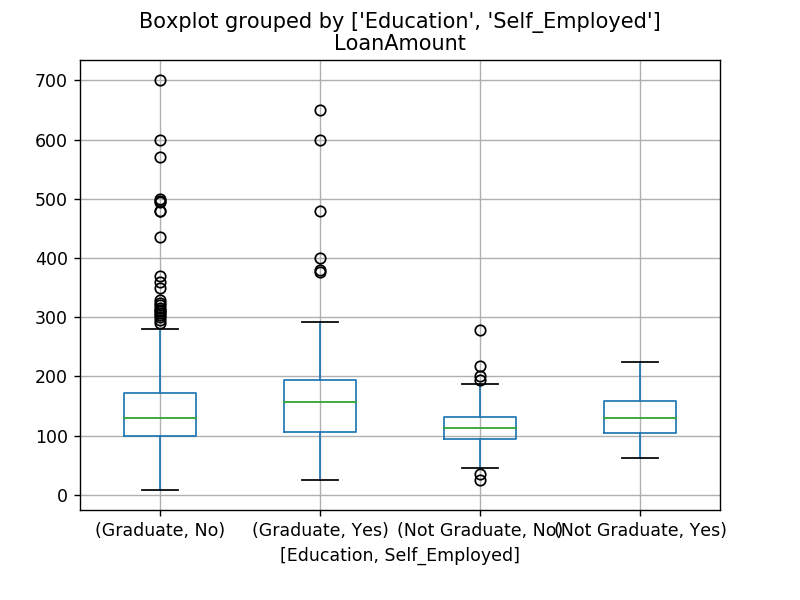

In [4]:
df.boxplot(column='LoanAmount', by = ['Education','Self_Employed'])

In [5]:
df['Self_Employed'].fillna('No',inplace=True)

In [6]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
print (table)
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

Education      Graduate  Not Graduate
Self_Employed                        
No                130.0         113.0
Yes               157.5         130.0


In [7]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<IPython.core.display.Javascript object>


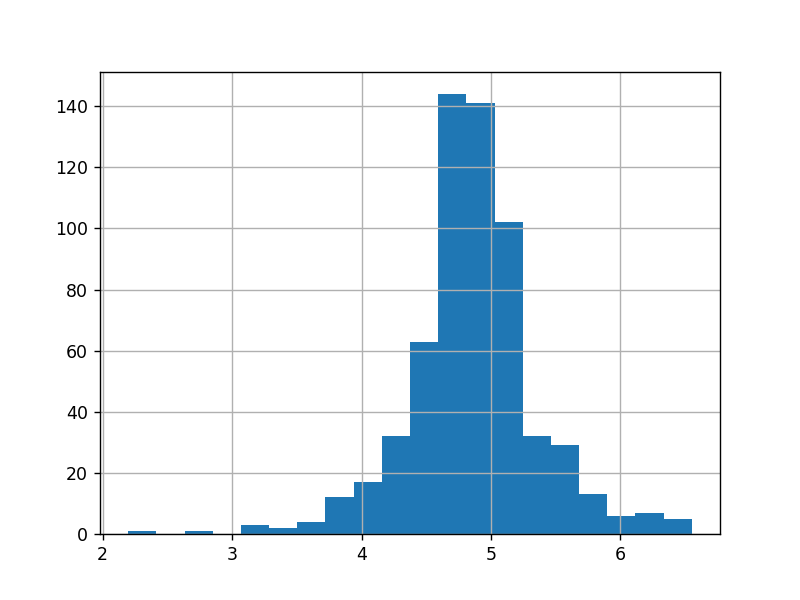

In [8]:
%matplotlib notebook

df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

<IPython.core.display.Javascript object>


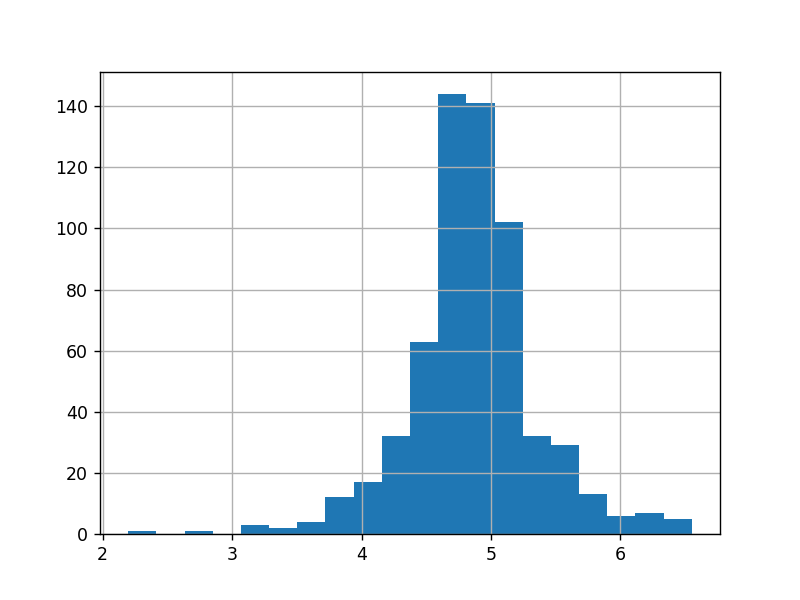

In [9]:
%matplotlib notebook
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20) 

In [10]:
#Gender, Married, Dependents, Loan_Amount_Term, Credit_History
df['Gender'].fillna(df['Gender'].value_counts().index[0],inplace=True)
df['Married'].fillna(df['Married'].value_counts().index[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].value_counts().index[0],inplace=True)
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log        0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [11]:
print (df['Dependents'].value_counts())
df['Dependents'].replace('3+',3, inplace = True)
df['Dependents'].replace('1',1, inplace = True)
df['Dependents'].replace('2',2, inplace = True)
df['Dependents'].replace('0',0, inplace = True)
print (df['Dependents'].value_counts())
#df['Dependents'] = df.Dependents.astype(float)
print (df['Dependents'])
table = df.pivot_table(values='Dependents', index='Gender' ,columns='Married', aggfunc=np.median)
def f(x):
 return table.loc[x['Gender'],x['Married']]
# Replace missing values
print (table)
df['Dependents'].fillna(df[df['Dependents'].isnull()].apply(f, axis=1), inplace=True)

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
0.0    345
1.0    102
2.0    101
3.0     51
Name: Dependents, dtype: int64
0      0.0
1      1.0
2      0.0
3      0.0
4      0.0
5      2.0
6      0.0
7      3.0
8      2.0
9      1.0
10     2.0
11     2.0
12     2.0
13     0.0
14     2.0
15     0.0
16     1.0
17     0.0
18     0.0
19     0.0
20     0.0
21     1.0
22     0.0
23     2.0
24     1.0
25     0.0
26     0.0
27     2.0
28     0.0
29     2.0
      ... 
584    1.0
585    1.0
586    0.0
587    0.0
588    0.0
589    2.0
590    0.0
591    2.0
592    3.0
593    0.0
594    0.0
595    0.0
596    2.0
597    NaN
598    0.0
599    2.0
600    3.0
601    0.0
602    3.0
603    0.0
604    1.0
605    0.0
606    1.0
607    2.0
608    0.0
609    0.0
610    3.0
611    1.0
612    2.0
613    0.0
Name: Dependents, Length: 614, dtype: float64
Married   No  Yes
Gender           
Female   0.0  0.0
Male     0.0  1.0


In [12]:
print (df['Credit_History'].value_counts())

1.0    475
0.0     89
Name: Credit_History, dtype: int64


In [13]:
df['Credit_History'].fillna(0,inplace=True)
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [14]:
#LoanAmount/TotalIncome

df['RatioLoantoIncome'] = df['LoanAmount']/df['TotalIncome']
print (df['RatioLoantoIncome'])

0      0.022226
1      0.021015
2      0.022000
3      0.024287
4      0.023500
5      0.027775
6      0.024682
7      0.028520
8      0.030369
9      0.014658
10     0.017949
11     0.025115
12     0.017891
13     0.024291
14     0.007128
15     0.025253
16     0.027809
17     0.021652
18     0.027215
19     0.018852
20     0.013577
21     0.027202
22     0.025715
23     0.021204
24     0.022734
25     0.019979
26     0.024149
27     0.020889
28     0.024272
29     0.020573
         ...   
584    0.031037
585    0.023617
586    0.027232
587    0.032333
588    0.019789
589    0.038885
590    0.008728
591    0.034167
592    0.031207
593    0.019835
594    0.016129
595    0.028698
596    0.025328
597    0.029461
598    0.018067
599    0.033218
600    0.008317
601    0.027260
602    0.022444
603    0.021562
604    0.041333
605    0.018226
606    0.029322
607    0.029085
608    0.020841
609    0.024483
610    0.009742
611    0.030438
612    0.024660
613    0.029020
Name: RatioLoantoIncome,

In [15]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
RatioLoantoIncome    float64
dtype: object

In [17]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

C:\Users\Shriya\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 77.036%
Cross-Validation Score : 77.041%


In [19]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 77.036%
Cross-Validation Score : 77.041%


In [20]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 77.199%
Cross-Validation Score : 76.553%


In [21]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 88.599%
Cross-Validation Score : 64.653%


In [22]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 73.292%


In [24]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

TotalIncome_log     0.295485
LoanAmount_log      0.253134
Credit_History      0.169845
Dependents          0.061311
Property_Area       0.058529
Loan_Amount_Term    0.053199
Education           0.027952
Married             0.027686
Gender              0.027107
Self_Employed       0.025752
dtype: float64


In [25]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 81.433%
Cross-Validation Score : 74.433%
